In [1]:
import pandas as pd
from math import sin, cos, asin, sqrt, pi
import matplotlib
import geopandas
from matplotlib import pyplot as plt
import numpy
import math

In [2]:
df = pd.read_csv("water_main_breaks.csv")

In [14]:
for col in df.columns: 
    print(col)

X
Y
OBJECTID
Cell_rotation
mslink
break_num
pipe_mslink
pipe_type
break_date
house_num
street_dir
street_name
street_type
Location
time_received
time_at_scene
time_off
time_on
num_bldgs_off
pipe_size
pipe_depth_ft
frost_depth_in
soil_type
remarks
break_year
break_month
break_day
materials_used
MainID
AssetCode
PageNumber
AssetNumber
FacilityID
MainRetired
BreakID
ICOUNT
created_user
created_date
last_edited_user
last_edited_date
BreakType
BreakTypeOther
StreetSegmentID
CWWOID
CWWOClosedDate
TotalHoursWaterOff


In [3]:
df = df.sort_values("pipe_depth_ft",ignore_index = True)

In [4]:
df["pipe_depth_ft"]

0       0.00
1       0.00
2       2.50
3       2.67
4       3.00
        ... 
6988     NaN
6989     NaN
6990     NaN
6991     NaN
6992     NaN
Name: pipe_depth_ft, Length: 6993, dtype: float64

In [5]:
data=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")

In [6]:
for col in data.columns: 
    print(col)

OBJECTID
Cell_rotat
mslink
break_num
pipe_mslin
pipe_type
break_date
house_num
street_dir
street_nam
street_typ
Location
time_recei
time_at_sc
time_off
time_on
num_bldgs_
pipe_size
pipe_depth
frost_dept
soil_type
remarks
break_year
break_mont
break_day
materials_
MainID
AssetCode
PageNumber
AssetNumbe
FacilityID
MainRetire
BreakID
ICOUNT
created_us
created_da
last_edite
last_edi_1
BreakType
BreakTypeO
StreetSegm
CWWOID
CWWOClosed
TotalHours
geometry


In [7]:
data["pipe_depth"]

0       6.50
1       6.00
2       4.00
3       6.17
4       4.00
        ... 
6988     NaN
6989     NaN
6990     NaN
6991     NaN
6992     NaN
Name: pipe_depth, Length: 6993, dtype: float64

In [8]:
data = data.sort_values("pipe_depth",ignore_index = True)

In [9]:
type(data["pipe_depth"][2])

numpy.float64

In [10]:
pipe_bell=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")

#pipe_bell['pipe_depth']=pipe_bell['pipe_depth'].astype(float)

pipe_bell=pipe_bell.dropna(subset=['pipe_depth'],inplace=True)

indexNames = pipe_bell[(pipe_bell['pipe_depth']<float(0)) | (pipe_bell['pipe_depth']>=float(2000000))].index

pipe_bell.drop(indexNames , inplace=True)

pipe_bell

TypeError: 'NoneType' object is not subscriptable

In [2]:
data_shape = geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
data_csv = pd.read_csv("water_main_breaks.csv")
tup=[0]*6993
data_shape["pipe_depth_ft"]=tup

for i in data_shape.index:
    
    for j in data_csv.index:
        if data_shape["OBJECTID"][i] == data_csv["OBJECTID"][j]:
            data_shape["pipe_depth_ft"][i]=data_csv["pipe_depth_ft"][j]
            break
                
data_shape

/home/gainthehouse/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/gainthehouse/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry,pipe_depth_ft
0,1,359.603239,1.0,225.0,18715.0,MAIN,2007-11-01,918.0,None,Regent,...,None,1970-01-01,None,None,4996,None,1970-01-01,NaN,POINT (-89.40211 43.06769),6.0
1,3,359.602939,27.0,226.0,15257.0,MAIN,2007-11-02,2255.0,None,Myrtle,...,WUPTB,2018-02-15,None,None,2031,None,1970-01-01,NaN,POINT (-89.35369 43.10999),6.0
2,4,359.602863,28.0,227.0,12532.0,MAIN,2007-11-05,3701.0,None,Margaret,...,WUPTB,2018-02-15,None,None,2610,None,1970-01-01,NaN,POINT (-89.32397 43.08879),4.0
3,5,44.602085,30.0,228.0,11178.0,MAIN,2007-11-07,533.0,None,Shady Wood,...,WUPTB,2018-02-15,None,None,3299,None,1970-01-01,NaN,POINT (-89.29538 43.09066),6.0
4,7,359.602838,32.0,230.0,12647.0,MAIN,2007-11-09,3906.0,None,Margaret,...,WUPTB,2018-02-15,None,None,3055,None,1970-01-01,NaN,POINT (-89.31824 43.08942),4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,59449,NaN,NaN,71678.0,NaN,SERVICE (WU),1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.47167 43.02902),NaN
6989,59450,NaN,NaN,71670.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.44371 43.04018),NaN
6990,59451,NaN,NaN,71715.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39218 43.05226),NaN
6991,59452,NaN,NaN,71789.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39753 43.05303),NaN


In [4]:
copy=data_shape.copy(deep=True)

In [37]:
copy = copy.sort_values("pipe_depth_ft",ignore_index = True)
copy

,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry,pipe_depth_ft
0,9261,NaN,NaN,90.0,52428.0,MAIN,2012-04-06,442.0,None,Rushmore,...,WUPTB,2018-02-15,None,None,6865,None,1970-01-01,1.0,POINT (-89.46547 43.05930),0.00
1,28236,NaN,NaN,119.0,NaN,MAIN,2015-05-13,NaN,None,None,...,WUPTB,2018-02-15,8399,None,3764,None,1970-01-01,3.0,POINT (-89.31625 43.08237),0.00
2,4465,74.602549,4652.0,137.0,18492.0,MAIN,1970-01-01,1014.0,S,Brooks,...,WUPTB,2018-02-15,None,None,6026,None,1970-01-01,1.0,POINT (-89.39988 43.05603),2.50
3,6044,357.747832,6435.0,14.0,18393.0,MAIN,2006-01-05,NaN,None,Kenward,...,None,1970-01-01,None,None,6166,None,1970-01-01,0.0,POINT (-89.39229 43.04786),2.67
4,5452,131.535218,6015.0,157.0,13649.0,MAIN,2008-09-03,315.0,S,Baldwin,...,WUPTB,2018-02-15,None,None,4267,None,1970-01-01,4.0,POINT (-89.36298 43.08482),3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,59449,NaN,NaN,71678.0,NaN,SERVICE (WU),1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.47167 43.02902),NaN
6989,59450,NaN,NaN,71670.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.44371 43.04018),NaN
6990,59451,NaN,NaN,71715.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39218 43.05226),NaN
6991,59452,NaN,NaN,71789.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39753 43.05303),NaN


In [38]:
indexNames = copy[(copy['pipe_depth_ft']<=5.5) | (copy['pipe_depth']>=6.5)].index
copy.drop(indexNames , inplace=True)


In [39]:
copy

,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry,pipe_depth_ft
919,11703,NaN,NaN,28.0,NaN,MAIN,2013-01-10,NaN,N,Yellowstone,...,None,1970-01-01,None,None,465,None,1970-01-01,2.0,POINT (-89.49454 43.07078),5.58
920,6283,290.467586,6691.0,165.0,13001.0,MAIN,2010-10-07,3139.0,None,James,...,WUPTB,2019-02-25,None,None,2802,None,1970-01-01,1.5,POINT (-89.33735 43.09793),5.58
921,5964,359.603516,6358.0,142.0,2314.0,MAIN,2009-03-07,4326.0,None,Windflower,...,WUPTB,2018-02-15,None,None,1093,None,1970-01-01,3.5,POINT (-89.44798 43.03091),5.58
922,4436,299.603109,4623.0,62.0,4289.0,MAIN,1970-01-01,6222.0,None,Pioneer,...,WUPTB,2018-02-15,None,None,30,None,1970-01-01,1.5,POINT (-89.49042 43.02916),5.58
923,10070,NaN,NaN,161.0,NaN,MAIN,2012-09-26,2314.0,None,Teal,...,WUPTB,2018-02-15,None,None,1132,None,1970-01-01,1.3,POINT (-89.47024 43.02795),5.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,59449,NaN,NaN,71678.0,NaN,SERVICE (WU),1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.47167 43.02902),NaN
6989,59450,NaN,NaN,71670.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.44371 43.04018),NaN
6990,59451,NaN,NaN,71715.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39218 43.05226),NaN
6991,59452,NaN,NaN,71789.0,NaN,MAIN,1970-01-01,NaN,None,None,...,WUJAG,2020-09-22,None,None,None,None,1970-01-01,NaN,POINT (-89.39753 43.05303),NaN


In [5]:
count=0
list=[]
for i in copy.index:
    if copy["pipe_depth_ft"][i]>=5.5 and copy["pipe_depth_ft"][i]<=6.5:
        count+=1
    else:
        list.append(i)
len(list)

5316

In [6]:
count

1677

In [7]:
copy.drop(list,inplace=True)
copy

,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry,pipe_depth_ft
0,1,359.603239,1.0,225.0,18715.0,MAIN,2007-11-01,918.0,None,Regent,...,None,1970-01-01,None,None,4996,None,1970-01-01,NaN,POINT (-89.40211 43.06769),6.0
1,3,359.602939,27.0,226.0,15257.0,MAIN,2007-11-02,2255.0,None,Myrtle,...,WUPTB,2018-02-15,None,None,2031,None,1970-01-01,NaN,POINT (-89.35369 43.10999),6.0
3,5,44.602085,30.0,228.0,11178.0,MAIN,2007-11-07,533.0,None,Shady Wood,...,WUPTB,2018-02-15,None,None,3299,None,1970-01-01,NaN,POINT (-89.29538 43.09066),6.0
6,9,359.603054,34.0,232.0,16600.0,MAIN,2007-11-13,425.0,None,Woodward,...,WUPTB,2018-02-15,None,None,1563,None,1970-01-01,NaN,POINT (-89.39182 43.12940),6.0
15,22,359.602737,48.0,247.0,10954.0,MAIN,2007-12-01,4906.0,None,Ralph,...,WUPTB,2018-02-15,None,None,3319,None,1970-01-01,NaN,POINT (-89.29774 43.09625),6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,39511,NaN,NaN,145.0,NaN,MAIN,2019-04-24,NaN,None,None,...,WUPTB,2019-10-15,9360,None,None,None,1970-01-01,2.0,POINT (-89.45141 43.05996),6.0
6807,39512,NaN,NaN,146.0,NaN,MAIN,2019-04-29,NaN,None,None,...,WUPTB,2019-10-15,9361,None,None,None,1970-01-01,2.0,POINT (-89.43774 43.05037),6.0
6810,39515,NaN,NaN,149.0,NaN,MAIN,2019-04-29,NaN,None,None,...,WUPTB,2019-10-15,9364,Dry Hole,None,None,1970-01-01,0.5,POINT (-89.44526 43.07407),6.0
6811,39516,NaN,NaN,150.0,NaN,SERVICE (WU),2019-05-09,NaN,None,None,...,WUPTB,2019-10-15,9365,bad flare,None,None,1970-01-01,1.8,POINT (-89.37280 43.13476),6.5


In [10]:
copy2=data_shape.copy(deep=True)
count2=0
list=[]
for i in copy2.index:
    if copy2["pipe_depth_ft"][i]>=0 and copy2["pipe_depth_ft"][i]<5.5:
        count2+=1
    elif copy2["pipe_depth_ft"][i]> 6.5:
        count2+=1
    else:
        list.append(i)
len(list)

5919

In [11]:
copy2.drop(list,inplace=True)
copy2

,OBJECTID,Cell_rotat,mslink,break_num,pipe_mslin,pipe_type,break_date,house_num,street_dir,street_nam,...,last_edite,last_edi_1,BreakType,BreakTypeO,StreetSegm,CWWOID,CWWOClosed,TotalHours,geometry,pipe_depth_ft
2,4,359.602863,28.0,227.0,12532.0,MAIN,2007-11-05,3701.0,None,Margaret,...,WUPTB,2018-02-15,None,None,2610,None,1970-01-01,NaN,POINT (-89.32397 43.08879),4.0
4,7,359.602838,32.0,230.0,12647.0,MAIN,2007-11-09,3906.0,None,Margaret,...,WUPTB,2018-02-15,None,None,3055,None,1970-01-01,NaN,POINT (-89.31824 43.08942),4.0
5,8,150.869632,33.0,231.0,12563.0,MAIN,2007-11-09,3638.0,None,Sargent,...,WUPTB,2018-02-15,None,None,2609,None,1970-01-01,NaN,POINT (-89.32449 43.08905),5.0
7,11,141.546099,36.0,234.0,15972.0,MAIN,2007-11-14,2818.0,None,Independence,...,WUPTB,2019-02-25,None,None,1708,None,1970-01-01,NaN,POINT (-89.30958 43.13465),9.0
8,12,130.549472,37.0,235.0,14817.0,MAIN,2007-11-16,NaN,None,Mayfair at Concord,...,None,1970-01-01,None,None,2357,None,1970-01-01,NaN,POINT (-89.32590 43.11298),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,39513,NaN,NaN,147.0,NaN,MAIN,2019-04-29,NaN,None,None,...,WUPTB,2019-10-15,9362,None,None,None,1970-01-01,0.8,POINT (-89.44385 43.07404),5.0
6809,39514,NaN,NaN,148.0,NaN,MAIN,2019-04-29,NaN,None,None,...,WUPTB,2019-10-15,9363,None,None,None,1970-01-01,0.8,POINT (-89.44382 43.07404),5.0
6813,39518,NaN,NaN,152.0,NaN,SERVICE (WU),2019-05-14,NaN,None,None,...,WUPTB,2019-10-15,9367,Hole caused by DR bole,None,None,1970-01-01,1.5,POINT (-89.31985 43.06032),5.0
6814,39519,NaN,NaN,153.0,NaN,MAIN,2019-05-16,NaN,None,None,...,WUPTB,2019-10-15,9368,None,None,None,1970-01-01,1.3,POINT (-89.53330 43.03013),13.0


In [8]:
ms = geopandas.read_file("zip://Zoning_Districts-shp.zip")

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

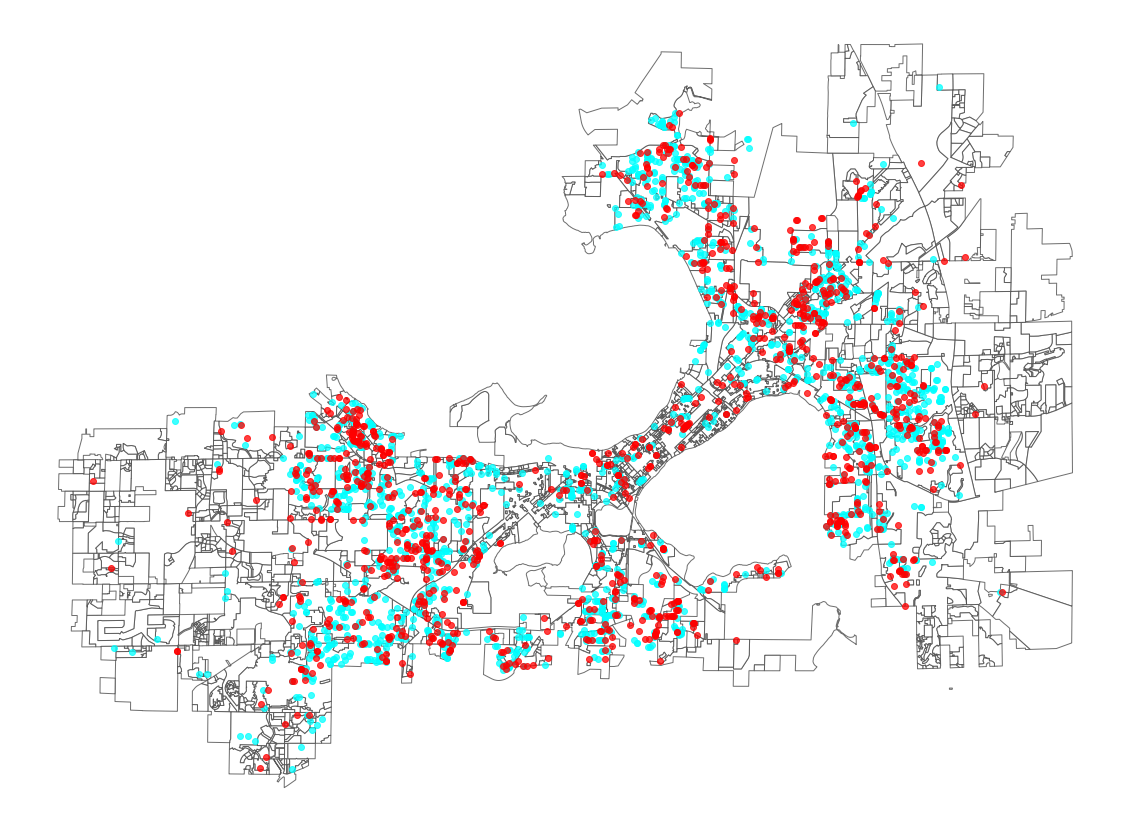

In [16]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "0.3",ax=ax,alpha=0.8)
copy.plot(color = "cyan",ax=ax,alpha=0.75)
copy2.plot(color = "red",ax=ax,alpha=0.75)
ax.axis("off")